# CVE

**Common Vulnerabilities and Exposures Identifier (CVE ID)** is a unique, alphanumeric identifier assigned by the CVE Program. Each identifier references a specific vulnerability. A CVE ID enables automation and multiple parties to discuss, share, and correlate information about a specific vulnerability, knowing they are referring to the same thing

> source: [www.cve.org](https://www.cve.org/ResourcesSupport/Glossary?activeTerm=glossaryCVEID)

You can see this notebook directly via:
- [GitHub](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cve/cve.ipynb)
- [Jupyter nbviewer](https://nbviewer.org/github/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cve/cve.ipynb)

## Generation time

In [1]:
from datetime import datetime, timezone, timedelta

timezone_offset = 0.0
tzinfo = timezone(timedelta(hours=timezone_offset))
generation_time = datetime.now(tzinfo).strftime('%Y-%m-%d %H:%M:%S %z')
print(generation_time)

2025-04-05 17:08:26 +0000


## Creative Commons

This notebook and generated diagrams are released with [Creative Commons liecense (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.en).

<a href="https://creativecommons.org/licenses/by/4.0/deed.en"><img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by.png" alt="CC BY 4.0" width="100px"/></a>

In [2]:
import requests
import urllib3

urllib3.disable_warnings()

urls = ['https://mirrors.creativecommons.org/presskit/icons/cc.xlarge.png',
       'https://mirrors.creativecommons.org/presskit/icons/by.xlarge.png']
for url in urls:
    file_name = url.split("/")[-1:][0]
    print(file_name)

    file = requests.get(url, verify=False)
    open(file_name, 'wb').write(file.content)

cc.xlarge.png
by.xlarge.png


## CVE data downloading

All CVE IDs are taken from [https://www.cve.org/Downloads](https://www.cve.org/Downloads)

In [3]:
url = 'https://github.com/CVEProject/cvelistV5/archive/refs/heads/main.zip'
file_name = url.split("/")[-1:][0]
print(file_name)

main.zip


In [4]:
import requests
import urllib3

urllib3.disable_warnings()

file = requests.get(url, verify=False)
open(file_name, 'wb').write(file.content)

465762550

In [5]:
import zipfile

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

## CVE data parsing

In [6]:
import os
import json
import pandas as pd

base_path = "cvelistV5-main/cves"
rows = []

for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)

    if not os.path.isdir(item_path) or not item.isdigit():
        continue

    year = int(item)

    for root, dirs, files in os.walk(item_path):
        for file in files:
            if file.endswith(".json"):
                full_path = os.path.join(root, file)

                try:
                    with open(full_path, "r", encoding="utf-8") as f:
                        data = json.load(f)
                        cve_id = data.get("cveMetadata", {}).get("cveId")
                        if cve_id:
                            rows.append({"number": cve_id, "year": year})
                except Exception as e:
                    print(f"Failed to parse {full_path}: {e}")

df = pd.DataFrame(rows).sort_values(by="number").reset_index(drop=True)

print(df)

               number  year
0       CVE-1999-0001  1999
1       CVE-1999-0002  1999
2       CVE-1999-0003  1999
3       CVE-1999-0004  1999
4       CVE-1999-0005  1999
...               ...   ...
288692  CVE-2025-3268  2025
288693  CVE-2025-3296  2025
288694  CVE-2025-3297  2025
288695  CVE-2025-3298  2025
288696  CVE-2025-3299  2025

[288697 rows x 2 columns]


In [7]:
df = df.groupby(['year'], as_index=False)[['number']].count()
df.reset_index(drop=True, inplace=True)
df.index += 1

df.style.bar(subset=['number'], color='#FF6200')

,year,number
1,1999,1579
2,2000,1242
3,2001,1556
4,2002,2393
5,2003,1554
6,2004,2707
7,2005,4767
8,2006,7142
9,2007,6580
10,2008,7176


## CVE data saving

CSV file is available in GitHub repository, see:

- [file via GitHub](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cve/cve-number-of-entries.csv)
- [file directly](https://raw.githubusercontent.com/LimberDuck/limberduck_org_julio_7/main/docs/notebooks/cve/cve-number-of-entries.csv)

In [8]:
csv_filename = 'cve-number-of-entries.csv'

df.to_csv(csv_filename, index=False)

## CVE data ploting

PNG files are available in GitHub repository with two background versions, see: 

- [file via GitHub (white background)](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cve/cve-number-of-entries-bg-white.png)
- [file via GitHub (transparent background)](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cve/cve-number-of-entries-bg-transparent.png)
- [file directly (white background)](https://raw.githubusercontent.com/LimberDuck/limberduck_org_julio_7/main/docs/notebooks/cve/cve-number-of-entries-bg-white.png)
- [file directly (transparent background)](https://raw.githubusercontent.com/LimberDuck/limberduck_org_julio_7/main/docs/notebooks/cve/cve-number-of-entries-bg-transparent.png)

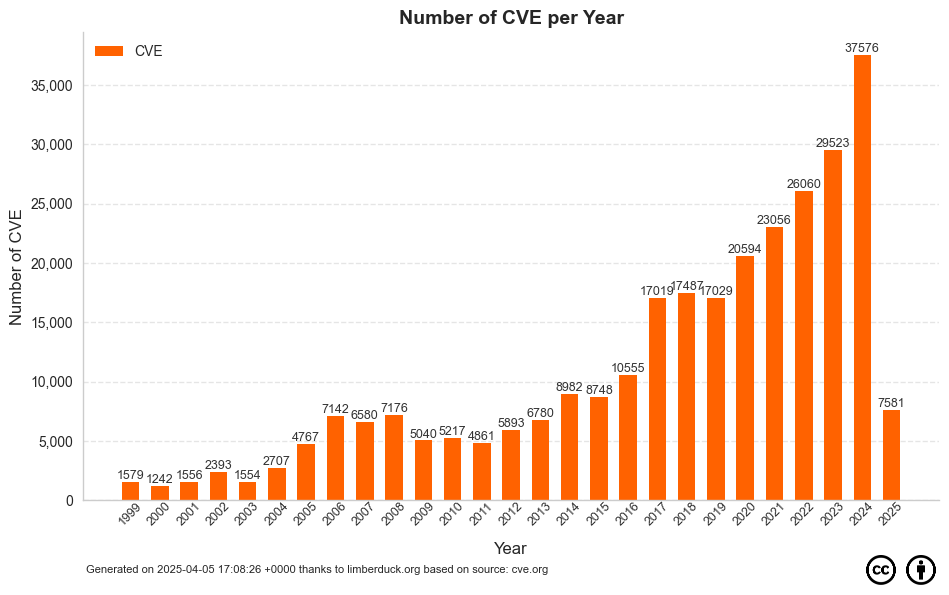

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib import ticker

df = pd.read_csv(csv_filename)

# Set style and colors
plt.style.use('seaborn-v0_8-whitegrid')
bar_color = '#FF6200'

# Create figure and axes
fig, ax = plt.subplots()

bars = ax.bar(df['year'], df['number'], color=bar_color, width=0.6)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=9, fontweight='light', color='#333333')

# Disable default x-axis ticks
ax.set_xticks([])

# Add labels below bars
for bar, label in zip(bars, df['year']):
    ax.text(bar.get_x() + bar.get_width() / 2,
            0,  # baseline
            str(label),
            ha='center', va='top',
            rotation=45,
            fontsize=9, color='#333333')

# Labels and title with improved font size
ax.set_xlabel('Year', fontsize=12, labelpad=30)
ax.set_ylabel('Number of CVE', fontsize=12)
ax.set_title('Number of CVE per Year', fontsize=14, fontweight='bold')

# Tweak spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Format Y-axis with thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.legend(['CVE'])
plt.figtext(0.12, 0.02,
            f"Generated on {generation_time} thanks to limberduck.org based on source: cve.org",
            ha="left", fontsize=8)

# Figure background
fig.set_size_inches(10, 6)
fig.patch.set_facecolor('white')

# License icons
img_cc = plt.imread('cc.xlarge.png')
newax_cc = fig.add_axes([0.88, 0.0, 0.05, 0.05], anchor='NE', zorder=-1)
newax_cc.imshow(img_cc)
newax_cc.axis('off')

img_by = plt.imread('by.xlarge.png')
newax_by = fig.add_axes([0.92, 0.0, 0.05, 0.05], anchor='NE', zorder=-1)
newax_by.imshow(img_by)
newax_by.axis('off')

# Save images
plt.savefig('cve-number-of-entries-bg-white.png', dpi=300, facecolor='white')
plt.savefig('cve-number-of-entries-bg-transparent.png', dpi=300, transparent=True)